# Task description
Please try solving the following task by building a Jupyter notebook or self-contained python script including the setup for a conda environment, and send us the link to your repository.
1. Download and extract https://cordis.europa.eu/data/cordis-h2020projects-csv.zip
2. Create a script that extracts the most important topics for each project from the csv
3. Create and show a tag cloud for a randomly selected 10 projects
4. Give us some ideas how you would process this data further, and try out one of them. Our goal is showing a concise preview that helps understand at one glance what the project is about.

We are interested in understanding your way of working, so we prefer a good version history over seeing the finished product only. Please keep it simple, we don’t expect you to add features beyond what was described above, we are more interested in your design decisions and rationale.

Feel free to use https://github.com/lisanka93/text_analysis_python_101/blob/master/Dummy%20movie%20dataset.ipynb as a starting point – but if you have a better idea how to start, we would love to learn from you.

**1.Read & Load Data**

In [2]:
import glob
import zipfile as zf
import pandas as pd

# Extract files from zip file and convert them into pandas dataframes

for zip_file in glob.glob("/content/sample_data/cordis-h2020projects-csv.zip"):
    zff  = zf.ZipFile(zip_file)
    dfs = [pd.read_csv(zff.open(f), sep=";") for f in zff.namelist()]
    print(zff.namelist())
    
    # print shape of datasets (dataframes)
    for i in range(len(dfs)):
        print(dfs[i].shape)

['csv/project.csv', 'csv/organization.csv', 'csv/legalBasis.csv', 'csv/topics.csv', 'csv/euroSciVoc.csv', 'csv/webLink.csv', 'csv/webItem.csv']
(35325, 19)
(170559, 25)
(52200, 4)
(35325, 3)
(87337, 4)
(130672, 9)
(7, 7)


In [5]:
#pick one of the dataframes topic.csv and take an overview about the content
dfs[3]

,projectID,topic,title
0,813360,MSCA-ITN-2018,Innovative Training Networks
1,754589,NFRP-1,Continually improving safety and reliability o...
2,851725,ERC-2019-STG,ERC Starting Grant
3,725042,ERC-2016-COG,ERC Consolidator Grant
4,818859,ERC-2018-COG,ERC Consolidator Grant
...,...,...,...
35320,862844,IBA-SEWP-WIRE-10-2019,WIRE X Conference
35321,741531,SwafS-20-2016,ERA Mobility and Career Day
35322,875911,IBA-SWFS-EUCYS-2019,European Union Contest for Young Scientists (E...
35323,811143,IBA-SWFS-EUCYS-2018,European Union Contest for Young Scientists (E...


**2.Explore the data**

In [6]:
dfs[3].info()
#it has 35325 entries, looks like quite a big data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   projectID  35325 non-null  int64 
 1   topic      35325 non-null  object
 2   title      35325 non-null  object
dtypes: int64(1), object(2)
memory usage: 828.1+ KB


In [7]:
dfs[3].describe()

,projectID
count,3.532500e+04
mean,1.064409e+07
std,2.986226e+07
min,1.157970e+05
25%,7.112210e+05
50%,7.929670e+05
75%,8.703780e+05
max,1.010467e+08


***3.preprocessing(I want to use the vectorizer to convert strings into numbers in order to apply clustering on the data)***

In [8]:
#Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [9]:
#change the overview into unicode and extract meaningful information
df3=dfs[3]
documents = df3['title'].values.astype("U")

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [12]:
#using K-Means clustering model to explore the data further
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)
#now we have 20 clusters from cluster 0 to cluster 19

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [14]:
#lableing lines and specifying which line belongs to which cluster
df3['cluster'] = model.labels_

In [15]:
df3.head(20)

,projectID,topic,title,cluster
0,813360,MSCA-ITN-2018,Innovative Training Networks,12
1,754589,NFRP-1,Continually improving safety and reliability o...,18
2,851725,ERC-2019-STG,ERC Starting Grant,17
3,725042,ERC-2016-COG,ERC Consolidator Grant,11
4,818859,ERC-2018-COG,ERC Consolidator Grant,11
5,848068,SC1-BHC-02-2019,Systems approaches for the discovery of combin...,18
6,699274,Sesar-09-2015,Trajectory Based Operations (TBO),18
7,801872,ERC-2018-STG,ERC Starting Grant,17
8,788368,ERC-2017-ADG,ERC Advanced Grant,13
9,751257,MSCA-IF-2016,Individual Fellowships,1


In [17]:
# output the result to a 20 csv file(20 clusters).

clusters = df3.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['topic','title']] # get title and overview columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()

***I want to see HOW the machine has seperated the data into 20 clusters, basically what are these clusters refering to!***

In [20]:
#check the center of gravity of each cluster
#using vectorizer to get feature names
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 data
 applications
 big
 egnss
 extreme
 technologies
 scale
 computing
 essential
 research
------------
Cluster 1:
 individual
 fellowships
 µchp
 evaluator
 evaluation
 evaluating
 evaluate
 euroscience
 europeans
 europeanisation
------------
Cluster 2:
 european
 night
 researchers
 associate
 pilot
 sme
 innovation
 euratom
 euraxess
 euro
------------
Cluster 3:
 proof
 concept
 erc
 grant
 proposals
 2016
 µchp
 euronanoforum
 euraxess
 euro
------------
Cluster 4:
 instrument
 sme
 euratom
 evaluations
 evaluation
 evaluating
 evaluate
 euroscience
 europeans
 europeanisation
------------
Cluster 5:
 potential
 stimulating
 carbon
 smes
 low
 innovation
 energy
 efficient
 businesses
 boosting
------------
Cluster 6:
 grants
 erc
 starting
 consolidator
 µchp
 european
 euraxess
 euro
 eurogeoss
 euronanoforum
------------
Cluster 7:
 skłodowska
 marie
 curie
 ef
 individual
 fellowships
 gf
 µchp
 euro
 eurogeoss
------------
Cluster 8:
 resea

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


***further data exploring + visualisation***

In [21]:
df3=dfs[3].iloc[:,[1,2]]
dff=pd.DataFrame(df3.value_counts().head(100).sample(10).reset_index())
dff

,topic,title,0
0,H2020-TWINN-2015,Twinning,67
1,MSCA-RISE-2014,Marie Skłodowska-Curie Research and Innovation...,89
2,INNOSUP-02-2016,European SME innovation Associate - pilot,81
3,FTIPilot-1-2015,Fast Track to Innovation Pilot,46
4,ERC-2016-ADG,ERC Advanced Grant,231
5,H2020EENSGA3,EEN H2020 SGA3,86
6,ERC-PoC-2014,ERC Proof of Concept Grant,121
7,SMEInst-09-2016-2017,Stimulating the innovation potential of SMEs f...,238
8,SC5-20-2015-1,Boosting the potential of small businesses for...,47
9,ERC-2017-PoC,ERC-Proof of Concept,160


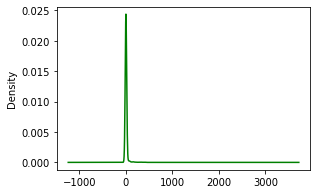

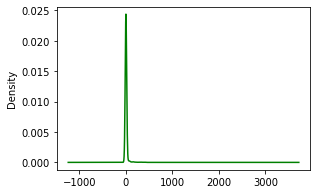

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# distribution pattern , reasonable explanantion, bimodal distribution, right-skewed
cols = df3.columns[:]
for col in range(len(df3.columns)):
    fig = plt.figure(figsize=(10,3))
    fig.add_subplot(1,2, col+1)
    df3[cols].value_counts().plot(kind='kde', color='g')
    #sns.distplot(x=df3.iloc[:,col].value_counts())
    plt.show()

***Tag cloud for 10 projects***

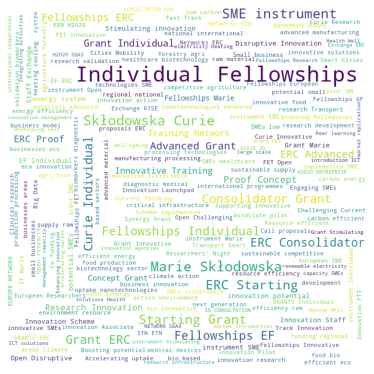

In [23]:
# import library to produce wordclouds
from wordcloud import WordCloud


all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df3[cols[1]]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()